In [ ]:
!curl -L https://abap34.com/ml-lecture/train.csv -o train.csv
!curl -L https://abap34.com/ml-lecture/test.csv -o test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    15    0    15    0     0    163      0 --:--:-- --:--:-- --:--:--   163
100  309k  100  309k    0     0  1218k      0 --:--:-- --:--:-- --:--:-- 1218k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    15    0    15    0     0    211      0 --:--:-- --:--:-- --:--:--   211
100 64519  100 64519    0     0   362k      0 --:--:-- --:--:-- --:--:--  362k


In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train

,最高気温(℃),平均気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均雲量(10分比),平均湿度(％),子供割合,ice1,ice2,ice3,ice4,ice5,ice6,ice7,ice8,売り上げ
0,16.7,12.6,0.000000,7.7,5.5,5.5,61.0,11.4,250,150,150,300,300,350,250,350,0.595533
1,25.9,22.6,21.145971,2.0,2.3,10.0,75.0,12.6,450,300,100,150,200,350,350,350,0.446416
2,26.7,20.0,21.754707,13.5,4.7,3.3,45.0,10.9,100,200,400,450,450,150,400,200,0.453032
3,31.3,27.1,0.000000,0.9,2.7,9.8,85.0,10.8,350,200,250,450,450,300,150,150,0.644235
4,26.2,19.7,0.000000,3.3,2.4,10.0,85.0,11.3,150,450,350,150,150,300,250,200,0.615920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,12.9,10.9,4.958982,2.2,2.2,8.3,63.0,11.0,150,100,300,400,450,150,150,250,0.415770
3207,32.0,24.9,22.364472,9.0,3.5,8.5,58.0,11.3,100,100,150,450,100,450,250,350,0.448675
3208,17.1,10.1,3.278023,10.9,2.0,3.5,46.0,11.0,350,300,250,350,450,100,400,350,0.453402
3209,12.1,6.7,42.488025,9.5,2.5,5.0,56.0,11.0,250,150,150,200,250,350,300,400,0.415192


In [ ]:
test

,最高気温(℃),平均気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均雲量(10分比),平均湿度(％),子供割合,ice1,ice2,ice3,ice4,ice5,ice6,ice7,ice8
0,10.0,4.1,0.000000,10.5,3.8,0.5,51.0,11.0,250,100,300,400,200,450,250,300
1,32.2,27.4,65.503225,2.7,2.4,8.5,85.0,11.9,200,450,200,350,250,400,150,200
2,13.7,9.6,0.599091,3.2,3.7,2.0,70.0,11.0,150,450,350,150,250,100,200,100
3,25.3,19.3,11.622781,10.7,2.8,6.0,52.0,11.0,150,400,300,200,100,100,100,150
4,12.0,7.7,0.000000,6.6,3.1,8.5,62.0,11.3,450,350,250,300,450,150,300,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,12.8,8.1,45.979216,4.1,3.7,5.3,72.0,11.0,200,350,300,400,300,300,200,450
799,37.8,32.9,0.000000,10.1,4.1,6.3,58.0,10.8,300,200,300,200,150,200,100,250
800,18.7,15.2,0.000000,1.1,1.8,7.8,82.0,11.3,150,150,150,250,450,150,200,350
801,16.1,10.6,35.940064,3.8,2.0,7.0,72.0,11.3,450,350,100,100,300,200,200,150


In [ ]:
train_y = train['売り上げ']

In [ ]:
train_y

0       0.595533
1       0.446416
2       0.453032
3       0.644235
4       0.615920
          ...   
3206    0.415770
3207    0.448675
3208    0.453402
3209    0.415192
3210    0.428246
Name: 売り上げ, Length: 3211, dtype: float64

In [ ]:
train_x = train.drop(columns=['売り上げ'])

In [ ]:
train_x

,最高気温(℃),平均気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均雲量(10分比),平均湿度(％),子供割合,ice1,ice2,ice3,ice4,ice5,ice6,ice7,ice8
0,16.7,12.6,0.000000,7.7,5.5,5.5,61.0,11.4,250,150,150,300,300,350,250,350
1,25.9,22.6,21.145971,2.0,2.3,10.0,75.0,12.6,450,300,100,150,200,350,350,350
2,26.7,20.0,21.754707,13.5,4.7,3.3,45.0,10.9,100,200,400,450,450,150,400,200
3,31.3,27.1,0.000000,0.9,2.7,9.8,85.0,10.8,350,200,250,450,450,300,150,150
4,26.2,19.7,0.000000,3.3,2.4,10.0,85.0,11.3,150,450,350,150,150,300,250,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,12.9,10.9,4.958982,2.2,2.2,8.3,63.0,11.0,150,100,300,400,450,150,150,250
3207,32.0,24.9,22.364472,9.0,3.5,8.5,58.0,11.3,100,100,150,450,100,450,250,350
3208,17.1,10.1,3.278023,10.9,2.0,3.5,46.0,11.0,350,300,250,350,450,100,400,350
3209,12.1,6.7,42.488025,9.5,2.5,5.0,56.0,11.0,250,150,150,200,250,350,300,400


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test = scaler.transform(test)

In [ ]:
train_x

array([[-0.57608795, -0.54374421, -0.45126801, ...,  0.65123484,
        -0.22945352,  0.65971719],
       [ 0.52751495,  0.6797841 ,  0.26053613, ...,  0.65123484,
         0.63479897,  0.65971719],
       [ 0.62348042,  0.36166674,  0.28102707, ..., -1.08521115,
         1.06692521, -0.64334938],
       ...,
       [-0.52810521, -0.84962629, -0.34092499, ..., -1.51932264,
         1.06692521,  0.65971719],
       [-1.1278894 , -1.26562591,  0.97894069, ...,  0.65123484,
         0.20267273,  1.09407271],
       [-0.78001457, -0.70280289, -0.35503189, ..., -0.21698815,
        -0.66157976, -0.64334938]])

In [ ]:
test

array([[-1.37979875, -1.58374327, -0.45126801, ...,  1.51945784,
        -0.22945352,  0.22536166],
       [ 1.28324303,  1.26707769,  1.75366579, ...,  1.08534634,
        -1.09370601, -0.64334938],
       [-0.93595846, -0.9108027 , -0.43110175, ..., -1.51932264,
        -0.66157976, -1.51206043],
       ...,
       [-0.33617427, -0.22562685, -0.45126801, ..., -1.08521115,
        -0.66157976,  0.65971719],
       [-0.64806205, -0.78844987,  0.75852681, ..., -0.65109965,
        -0.66157976, -1.07770491],
       [-1.58372538, -1.57150799, -0.45126801, ...,  0.21712335,
        -0.66157976, -1.07770491]])

In [ ]:
train_y = train_y.values.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.3, random_state=34)

In [ ]:
train_x.shape

(2247, 16)

In [ ]:
val_x.shape

(964, 16)

In [ ]:
import torch

train_x = torch.tensor(train_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)
val_x = torch.tensor(val_x, dtype=torch.float32)
val_y = torch.tensor(val_y, dtype=torch.float32)
test = torch.tensor(test, dtype=torch.float32)

In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(16, 32),
    nn.Sigmoid(),
    nn.Linear(32, 64),
    nn.Sigmoid(),
    nn.Linear(64, 1)
)

In [ ]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0272, -0.0313,  0.0135,  0.2145, -0.0284,  0.0423,  0.2328, -0.1520,
                        0.1519,  0.1960, -0.0157,  0.0191,  0.0106,  0.0596, -0.0564, -0.1953],
                      [ 0.1966,  0.0540, -0.1316, -0.2489,  0.0496, -0.0892, -0.2196,  0.2494,
                        0.1455, -0.1575,  0.1089,  0.0662, -0.1076, -0.2113,  0.1978,  0.0503],
                      [-0.1294,  0.1254, -0.1411, -0.2489,  0.0793, -0.0241,  0.1660,  0.2213,
                       -0.1978, -0.0502,  0.2393, -0.0050,  0.0745,  0.0782,  0.1286, -0.0582],
                      [ 0.1397,  0.1240,  0.1513, -0.2164, -0.0396, -0.1331, -0.1605, -0.1424,
                        0.2382,  0.2496, -0.1444,  0.1727,  0.1210,  0.1317, -0.1112,  0.0255],
                      [ 0.2174, -0.1551, -0.0193, -0.1701,  0.0402, -0.0850,  0.0953, -0.1039,
                        0.1988,  0.1954,  0.1267,  0.0452, -0.1899,  0.2469,  0.0342, -0.0094],
                   

In [ ]:
dummy_input = torch.rand(1, 16)
model(dummy_input)

tensor([[-0.1672]], grad_fn=<AddmmBackward0>)

In [ ]:
train_x

tensor([[ 1.2832,  1.2671, -0.4513,  ...,  1.5195, -0.2295,  1.5284],
        [-0.8040, -0.4703,  1.1056,  ...,  1.5195,  0.6348, -1.0777],
        [-1.2239, -1.3146,  3.6936,  ..., -1.0852, -1.5258,  0.6597],
        ...,
        [-1.1999, -1.2656, -0.4513,  ...,  1.0853,  0.2027, -0.2090],
        [ 0.4076,  0.3372, -0.4513,  ...,  0.6512,  1.4991,  1.5284],
        [ 0.2156,  0.2393, -0.4513,  ..., -0.6511,  0.6348,  0.2254]])

In [ ]:
train_y

tensor([[0.6773],
        [0.4197],
        [0.3969],
        ...,
        [0.6054],
        [0.6312],
        [0.6310]])

In [ ]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(train_x, train_y)
val_dataset = TensorDataset(val_x, val_y)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for inputs, targets in train_dataloader:
    print('inputs.shape', inputs.shape)
    print('targets.shape', targets.shape)
    print('-------------')

inputs.shape torch.Size([32, 16])
targets.shape torch.Size([32, 1])
-------------
inputs.shape torch.Size([32, 16])
targets.shape torch.Size([32, 1])
-------------
inputs.shape torch.Size([32, 16])
targets.shape torch.Size([32, 1])
-------------
inputs.shape torch.Size([32, 16])
targets.shape torch.Size([32, 1])
-------------
inputs.shape torch.Size([32, 16])
targets.shape torch.Size([32, 1])
-------------
inputs.shape torch.Size([32, 16])
targets.shape torch.Size([32, 1])
-------------
inputs.shape torch.Size([32, 16])
targets.shape torch.Size([32, 1])
-------------
inputs.shape torch.Size([32, 16])
targets.shape torch.Size([32, 1])
-------------
inputs.shape torch.Size([32, 16])
targets.shape torch.Size([32, 1])
-------------
inputs.shape torch.Size([32, 16])
targets.shape torch.Size([32, 1])
-------------
inputs.shape torch.Size([32, 16])
targets.shape torch.Size([32, 1])
-------------
inputs.shape torch.Size([32, 16])
targets.shape torch.Size([32, 1])
-------------
inputs.shape tor

In [ ]:
criterion = nn.MSELoss()
criterion(torch.tensor([1.0, 2.0, 4.0]), torch.tensor([2.0, 3.0, 4.0]))

tensor(0.6667)

In [ ]:
dummy_input = torch.rand(1, 16)
dummy_target = torch.rand(1, 1)

pred = model(dummy_input)
loss = criterion(pred, dummy_target)
loss.backward()

In [ ]:
for param in model.parameters():
    print(param.grad)

tensor([[-3.7119e-04, -2.5695e-04, -4.9469e-04, -8.5532e-04, -3.9031e-04,
         -3.7200e-04, -1.3044e-04, -6.2145e-04, -7.3912e-04, -4.3755e-05,
         -1.4052e-04, -3.3890e-04, -2.1581e-04, -5.0447e-04, -2.0402e-04,
         -7.3284e-04],
        [-2.2340e-03, -1.5465e-03, -2.9773e-03, -5.1477e-03, -2.3491e-03,
         -2.2389e-03, -7.8502e-04, -3.7401e-03, -4.4483e-03, -2.6334e-04,
         -8.4571e-04, -2.0397e-03, -1.2988e-03, -3.0361e-03, -1.2279e-03,
         -4.4105e-03],
        [-1.6888e-03, -1.1690e-03, -2.2506e-03, -3.8914e-03, -1.7758e-03,
         -1.6925e-03, -5.9343e-04, -2.8273e-03, -3.3627e-03, -1.9907e-04,
         -6.3931e-04, -1.5419e-03, -9.8184e-04, -2.2951e-03, -9.2820e-04,
         -3.3341e-03],
        [ 6.6409e-04,  4.5970e-04,  8.8503e-04,  1.5302e-03,  6.9830e-04,
          6.6554e-04,  2.3336e-04,  1.1118e-03,  1.3223e-03,  7.8280e-05,
          2.5140e-04,  6.0632e-04,  3.8609e-04,  9.0253e-04,  3.6500e-04,
          1.3111e-03],
        [ 3.7356e-04

In [ ]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
train_losses = []
val_losses = []

In [ ]:
n_epoch = 10
for epoch in range(n_epoch):
    running_loss = 0.0

    for inputs, targets in train_dataloader:
        # 勾配の初期化
        optimizer.zero_grad()

        # 順伝播と誤差の計算
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # 逆伝播とパラメータの更新
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    # エポックごとの損失の表示
    train_loss = running_loss / len(train_dataloader)
    val_loss = val_loss / len(val_dataloader)
    train_losses.append(train_loss) # これが追加された
    val_losses.append(val_loss)
    print(f'Epoch {epoch + 1} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.10f}')

Epoch 1 - Train Loss: 0.0193 - Val Loss: 0.0069653585
Epoch 2 - Train Loss: 0.0070 - Val Loss: 0.0068478256
Epoch 3 - Train Loss: 0.0070 - Val Loss: 0.0068154427
Epoch 4 - Train Loss: 0.0069 - Val Loss: 0.0068225868
Epoch 5 - Train Loss: 0.0069 - Val Loss: 0.0066354563
Epoch 6 - Train Loss: 0.0068 - Val Loss: 0.0067189654
Epoch 7 - Train Loss: 0.0069 - Val Loss: 0.0065848581
Epoch 8 - Train Loss: 0.0068 - Val Loss: 0.0065670557
Epoch 9 - Train Loss: 0.0068 - Val Loss: 0.0065383632
Epoch 10 - Train Loss: 0.0068 - Val Loss: 0.0066090981


In [ ]:
import matplotlib.pyplot as plt

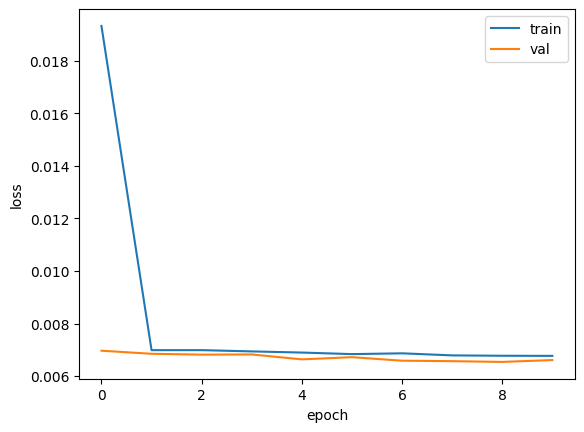

In [ ]:
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
predictions = model(test)

In [ ]:
import csv

def write_pred(predictions, filename='submit.csv'):
    pred = predictions.squeeze().tolist()
    with open(filename, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows([[x] for x in pred])

In [ ]:
write_pred(predictions)